IMAGE OCR YOUTUBE INTEGRATION

In [43]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

In [44]:
#configuring tesseract executable path
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"

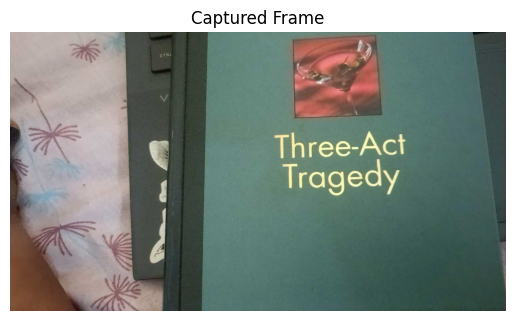

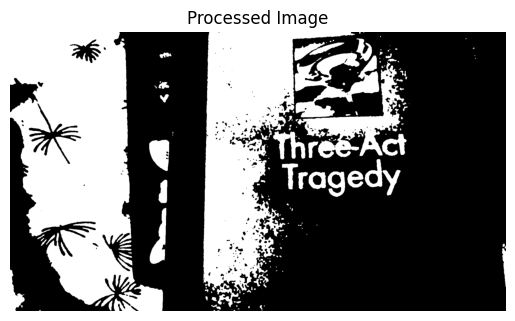

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Three-Act Tragedy


In [45]:
##function to preprocess the image

import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np

def process_img(img):
    """Preprocess image for better OCR accuracy."""
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    # Increase contrast using CLAHE
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(blurred)

    # Bilateral filter to reduce noise
    denoised = cv2.bilateralFilter(enhanced, 9, 75, 75)

    # Otsu thresholding
    _, binary = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Morphological cleaning
    kernel = np.ones((2, 2), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

    # Resize for better OCR readability
    resized = cv2.resize(binary, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

    plt.imshow(resized, cmap='gray')
    plt.title('Processed Image')
    plt.axis('off')
    plt.show()

    return resized  

IP_CAMERA_URL = "http://10.53.150.98:8080/video"
cap = cv2.VideoCapture(IP_CAMERA_URL)
ret, frame = cap.read()
cap.release() 

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Show image using matplotlib
plt.imshow(frame_rgb)
plt.title("Captured Frame")
plt.axis("off")
plt.show()



if not ret:
    print("Failed to capture image from IP camera.")
else:
    image=process_img(frame)
    
    cv2.imwrite("temp_frame.jpg", image) 

    
import easyocr

# Initialize the OCR reader (supports English)
reader = easyocr.Reader(['en'])
image_path = "temp_frame.jpg"
results = reader.readtext(image_path)

# Extract text
extracted_text = " ".join([res[1] for res in results])
print(extracted_text)



In [46]:
from selenium import webdriver  # Controls Chrome browser
from selenium.webdriver.common.by import By  # Detects UI features like search bar, click button, etc.
from selenium.webdriver.common.keys import Keys  # Automates enter key
from selenium.webdriver.support.ui import WebDriverWait  # Waits for elements to appear before interacting
from selenium.webdriver.support import expected_conditions as EC  # Checks element visibility
from selenium.common.exceptions import ElementClickInterceptedException, TimeoutException
import time  # Adds delays

def search_and_play_on_youtube(query):
    driver = webdriver.Chrome()  # Loads Chrome

    # Open YouTube
    driver.get("https://www.youtube.com/")
    
    wait = WebDriverWait(driver, 10)
    
    try:
        # Wait until search bar appears
        search_box = wait.until(EC.presence_of_element_located((By.NAME, "search_query")))

        # 🔹 Enter the extracted headline as search query
        search_box.send_keys(query)
        search_box.send_keys(Keys.RETURN)  # Press Enter
        time.sleep(3)

        # 🔹 Locate first video thumbnail
        first_video = wait.until(EC.presence_of_element_located((By.XPATH, "(//a[@id='thumbnail'])[1]")))

        # 🔹 Scroll to the first video to ensure it's visible
        driver.execute_script("arguments[0].scrollIntoView();", first_video)
        time.sleep(1)  # Allow UI to settle

        # 🔹 Click the first video (Handling Click Interception)
        for _ in range(3):  # Try clicking up to 3 times
            try:
                driver.execute_script("arguments[0].click();", first_video)  # Force click via JS
                break
            except ElementClickInterceptedException:
                time.sleep(1)  # Retry after a short delay

        time.sleep(5)  # Wait for video to load
        print("✅ Playing the most relevant YouTube video...")

    except TimeoutException:
        print("❌ Failed to find search results. Check internet or query.")
    
    return driver  # Keeps browser open for further interaction


if __name__ == "__main__":
    extracted_text = extracted_text  # Replace this with actual extracted text

    if extracted_text:
        driver = search_and_play_on_youtube(extracted_text)
    else:
        print("⚠️ No headline detected!")



✅ Playing the most relevant YouTube video...
